In [268]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [269]:
data = pd.read_csv('data.csv')

In [270]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Visualization of data

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

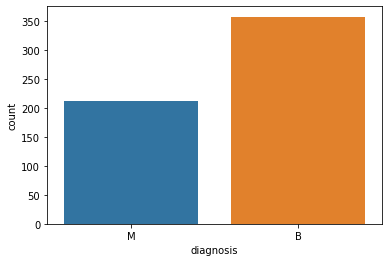

In [271]:
sns.countplot(data['diagnosis'],label = 'count')


## Pre-Processing of data

#### removing the Null value

In [272]:
data.drop(['Unnamed: 32'],axis=1,inplace=True)

In [273]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### extracing value of X,Y from data

In [274]:
x = data.iloc[:,2:]

y = data['diagnosis']

y = np.where(y=='M',1,0)

#### converting into array

In [275]:
x = np.array(x)
y = np.array(y)
print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 

## Feature scalling


In [276]:
print("Value of X befor feature scalling",x)
mean = np.mean(x) 
std = np.std(x)
x = (x - mean)/std
print("Value of X after feature scalling",x)

Value of X befor feature scalling [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
Value of X after feature scalling [[-0.19229615 -0.22562986  0.26679799 ... -0.26993435 -0.26908152
  -0.27057606]
 [-0.1809951  -0.19325981  0.31103852 ... -0.27028214 -0.2698923
  -0.27070694]
 [-0.18484972 -0.17801653  0.29833579 ... -0.27003247 -0.26951429
  -0.27071325]
 ...
 [-0.1983847  -0.14809942  0.20328434 ... -0.27047575 -0.27012533
  -0.27075434]
 [-0.1808637  -0.1426241   0.34257633 ... -0.26993611 -0.26930666
  -0.27055372]
 [-0.23710612 -0.16360551 -0.06119523 ... -0.27109687 -0.2698393
  -0.27078855]]


## Splitting of data

In [277]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [278]:
print("Dimention of x_train",x_train.shape)
print("Dimention of y_train",y_train.shape)
print("Dimention of x_test",x_test.shape)
print("Dimention of y_test",y_test.shape)

Dimention of x_train (455, 30)
Dimention of y_train (455,)
Dimention of x_test (114, 30)
Dimention of y_test (114,)


## reshaping the data

In [279]:
x_train = x_train.T
y_train = y_train.reshape(1,x_train.shape[1])
x_test = x_test.T
y_test = y_test.reshape(1,x_test.shape[1])

In [280]:
print("Dimention of x_train",x_train.shape)
print("Dimention of y_train",y_train.shape)
print("Dimention of x_test",x_test.shape)
print("Dimention of y_test",y_test.shape)

Dimention of x_train (30, 455)
Dimention of y_train (1, 455)
Dimention of x_test (30, 114)
Dimention of y_test (1, 114)


## LogisticRegression Model

In [281]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def model(x,y,iteration,learning_rate):
    m = x.shape[1]
    n = x.shape[0]
    b = 0
    theta = np.zeros((n,1))
    cost_list = []
    for i in range(iteration):
        z = np.dot(theta.T,x)+b
        prediction = sigmoid(z)
        cost = -(1/m)*np.sum(y*np.log(prediction)+(1 - y)*np.log(1 - prediction))
        dW = (1/m)*np.dot(prediction - y,x.T)
        dB = (1/m)*np.sum(prediction - y)
        theta = theta - learning_rate*dW.T
        b = b - learning_rate*dB
        cost_list.append(cost)
        if(i%(iteration/10)==0):
            print("cost", cost)
    return theta,b,cost_list
    

In [351]:
iteration = 1000000
learning_rate = 0.0001

## Training the Model

In [352]:
theta,b,cost_list = model(x_train,y_train,iteration = iteration,learning_rate = learning_rate)
theta.shape



cost 0.6931471805599453
cost 0.3329669424239049
cost 0.2747041309927722
cost 0.25013456713908
cost 0.23618903501897204
cost 0.22700954438969062
cost 0.22040106309774496
cost 0.21534886839287598
cost 0.2113168654372081
cost 0.20799415255605172


()

## Testing tha model

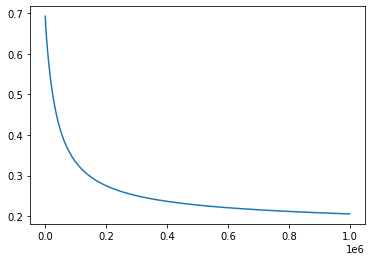

In [359]:
plt.plot(np.arange(iteration),cost_list)

In [360]:
def accuracy(x,y,theta,b):
    z = np.dot(theta.T,x)
    prediction = sigmoid(z)
    prediction = prediction>0.5
    prediction = np.array(prediction,dtype = 'int64')
    acc = (1-np.sum(np.absolute(prediction - y))/y.shape[1])*100
    print("Accuracy of the model is : ",acc,"%")

In [361]:
accuracy(x_test,y_test,theta,b)

Accuracy of the model is :  75.43859649122807 %
